In [173]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [174]:
df_final = pd.DataFrame()
for df in range(1,5):
    df = pd.read_csv(f'assng2_dataset - Sheet{df}.csv')
    df_final = pd.concat([df_final,df],ignore_index= True)
df = pd.read_csv('US_Accidents_Dec20_Updated_sheet1.csv')
df_final = pd.concat([df_final,df])
df_final.head()                                         # Mergin of all the dataframes

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,21-06-18 7:50,21-06-18 13:50,32.92393,-96.77563,32.92379,-96.76877,0.398,Ramp to US-75 - Accident. Two lanes blocked. H...,NaN,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Day,Day,Day,Day
1,2,22-12-17 17:23,22-12-17 17:53,33.236919,-87.560966,33.236919,-87.560966,0,Accident on US-82 McFarland Blvd Westbound at ...,3200,...,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,Night,Night,Day,Day
2,2,11-12-19 15:27,11-12-19 16:38,33.02304,-117.07853,33.02304,-117.07853,0,At Rancho Bernardo Rd - Accident. Obstruction ...,NaN,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Day,Day,Day,Day
3,2,09-10-19 15:06,09-10-19 15:39,38.366671,-122.712364,38.366671,-122.712364,0,At Commerce Blvd/Wilfred Ave - Accident.,NaN,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Day,Day,Day,Day
4,2,03-12-19 23:44,04-12-19 1:56,38.597976,-121.383093,38.597976,-121.383093,0,At Arden Way - Accident.,NaN,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Night,Night,Night,Night


In [175]:
dff= df_final[['Severity','Description','City','County','State','Country','Visibility(mi)','Start_Time', 'End_Time']]   # These are the selected few with necessary information 
dff.dropna(inplace = True)
dff.head()

D:\Users\Ridham Suhagiya\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Severity,Description,City,County,State,Country,Visibility(mi),Start_Time,End_Time
0,3,Ramp to US-75 - Accident. Two lanes blocked. H...,Dallas,Dallas,TX,US,10,21-06-18 7:50,21-06-18 13:50
1,2,Accident on US-82 McFarland Blvd Westbound at ...,Northport,Tuscaloosa,AL,US,4,22-12-17 17:23,22-12-17 17:53
2,2,At Rancho Bernardo Rd - Accident. Obstruction ...,San Diego,San Diego,CA,US,10,11-12-19 15:27,11-12-19 16:38
3,2,At Commerce Blvd/Wilfred Ave - Accident.,Santa Rosa,Sonoma,CA,US,10,09-10-19 15:06,09-10-19 15:39
4,2,At Arden Way - Accident.,Sacramento,Sacramento,CA,US,0.25,03-12-19 23:44,04-12-19 1:56


In [176]:
len(dff[dff.Severity == 'Severity'])    # Having a String in the severity columne i had a thought of removing all the dummy values as they are less in numbers



3

In [177]:
dff1 = dff[dff.Severity != 'Severity']
dff1.Severity  =  dff1.Severity.apply(lambda x : int(x))
dff1.head()                                             #Removal of dummy values from the Severity column

D:\Users\Ridham Suhagiya\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Severity,Description,City,County,State,Country,Visibility(mi),Start_Time,End_Time
0,3,Ramp to US-75 - Accident. Two lanes blocked. H...,Dallas,Dallas,TX,US,10,21-06-18 7:50,21-06-18 13:50
1,2,Accident on US-82 McFarland Blvd Westbound at ...,Northport,Tuscaloosa,AL,US,4,22-12-17 17:23,22-12-17 17:53
2,2,At Rancho Bernardo Rd - Accident. Obstruction ...,San Diego,San Diego,CA,US,10,11-12-19 15:27,11-12-19 16:38
3,2,At Commerce Blvd/Wilfred Ave - Accident.,Santa Rosa,Sonoma,CA,US,10,09-10-19 15:06,09-10-19 15:39
4,2,At Arden Way - Accident.,Sacramento,Sacramento,CA,US,0.25,03-12-19 23:44,04-12-19 1:56


In [178]:
dff1.shape                  #Keeping an eye on the shape of the Dataframe

(23093, 9)

In [179]:
def year(df):                                                       # We wanted the day and year of accident to proceed the problem,i thought of using the date given on the start time .
                                                                    # The reason for using the start time over end time is that start time give us the time at which accident occured
                                                                    #So with the help of different method i got hold of the year as well as the day,by applying the year and the day function respectively. 
    if len(df.strip().split(' ')) > 1:
        return int(df.strip().split(' ')[0].strip().split('-')[-1])
        
def day(df):
    if len(df.strip().split(' '))> 1:
        return int(df.strip().split(' ')[0].strip().split('-')[0])
dff1['Year'] = dff1['Start_Time'].apply(year)
dff1['day'] = dff1['Start_Time'].apply(day)
dff1.dropna(inplace = True)
dff1.head()

D:\Users\Ridham Suhagiya\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
D:\Users\Ridham Suhagiya\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
D:\Users\Ridham Suhagiya\AppData\Local\Programs\Python\Python37-32\lib\site-packages\panda

,Severity,Description,City,County,State,Country,Visibility(mi),Start_Time,End_Time,Year,day
0,3,Ramp to US-75 - Accident. Two lanes blocked. H...,Dallas,Dallas,TX,US,10,21-06-18 7:50,21-06-18 13:50,18.0,21.0
1,2,Accident on US-82 McFarland Blvd Westbound at ...,Northport,Tuscaloosa,AL,US,4,22-12-17 17:23,22-12-17 17:53,17.0,22.0
2,2,At Rancho Bernardo Rd - Accident. Obstruction ...,San Diego,San Diego,CA,US,10,11-12-19 15:27,11-12-19 16:38,19.0,11.0
3,2,At Commerce Blvd/Wilfred Ave - Accident.,Santa Rosa,Sonoma,CA,US,10,09-10-19 15:06,09-10-19 15:39,19.0,9.0
4,2,At Arden Way - Accident.,Sacramento,Sacramento,CA,US,0.25,03-12-19 23:44,04-12-19 1:56,19.0,3.0


In [180]:
dff1.shape           #Keeping an eye on the shape of the Dataframe

(22805, 11)

In [181]:
dct = {}                                    # grouped the dataframe with respect to the years 
                                            # to remove the max,min and all other values of the accidents which occured in the following years
                                            # And took row row as the number of accidents occured in that year.
for keys,dataf in dff1.groupby('Year'):     
    dct[keys] = dataf.shape[0]

In [182]:
df6 = pd.DataFrame(dct.values(),dct.keys())  
df6['year'] = df6.index   # Converting the dct to a DataFrame for better visualisatin
df6 = df6.rename(columns={0:'Accidents'})

df6.head()      # Number of Accident occured in the following years

,Accidents,year
16.0,2163,16.0
17.0,3466,17.0
18.0,4324,18.0
19.0,4918,19.0
20.0,7934,20.0


In [183]:
df6.sort_values(by = 'year').head()

,Accidents,year
16.0,2163,16.0
17.0,3466,17.0
18.0,4324,18.0
19.0,4918,19.0
20.0,7934,20.0


In [184]:
df6[df6['Accidents'] == max(df6['Accidents'])]      # Desired ans

,Accidents,year
20.0,7934,20.0


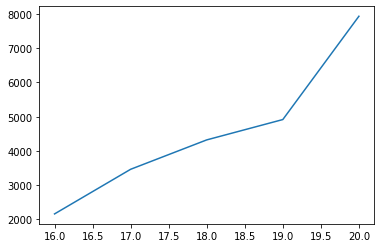

In [185]:
plt.plot(df6['year'],df6.Accidents)
plt.show()       

This shows some concern because accidents are just increasing linearly 
1) First reason Could be the automobile manufacture but i went through but they were contradicitng to what i assumend
2) It is the stress survey and it showed some inclination to it.I assumed that if a stress or work load of an employee is increased then it may be possible that he she may get frustrated and it this happence while driving it may be cautious  


In [186]:
dct1 = {}
for keys,dataf in dff1.groupby('day'):          # same method used for days as well
    dct1[keys] = dataf.shape[0]

In [187]:
df7 = pd.DataFrame(dct1.values(),dct1.keys())
df7['day'] = df7.index
df7 = df7.rename(columns={0:'Accidents'})   

df7.head()               # Number of Accident occured in the following days

,Accidents,day
1.0,657,1.0
2.0,684,2.0
3.0,711,3.0
4.0,644,4.0
5.0,659,5.0


In [188]:
df7.sort_values(by = 'day').head()           #Sorting the dataframe with respect to the day

,Accidents,day
1.0,657,1.0
2.0,684,2.0
3.0,711,3.0
4.0,644,4.0
5.0,659,5.0


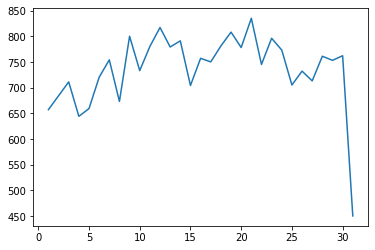

In [189]:
plt.plot(df7['day'],df7.Accidents)
plt.show()                                          #PLot of day against accidents

In [190]:
df7[df7['Accidents'] == max(df7['Accidents'])]           # Desired ans

,Accidents,day
21.0,835,21.0


The graph shows suddent decrease in accidents which is half of the average occuring on the 31st day 

Reasons of this may be:
1) Because less then 31st occurs half the time of the whole year.
2) On average 4-5 months on there is a sunday or saturday so people often stay home as they are tired of the whole working week.